In [3]:
import sys
sys.path.append("../")

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import re
import src.visualization as vs
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [33]:
import plotly.express as px
import plotly.graph_objects as go

### Importo mi csv con el dataframe enriquecido

In [12]:
df = pd.read_csv("../data/Food_enriched.csv", index_col =0) #para que no me figure la columna Unnamed: 0

In [13]:
df.head()

,Food,Serving,Calories,dietLabels,healthLabels,cautions,FAT.Total lipid,Total SUGAR(g),Total PROTEIN(g),Cholesterol(mg),Calcium(mg),VIT C(mg),Whater quantity,Sugar added
0,Artichoke,1 artichoke (128 g),60 cal,"['LOW_CARB', 'LOW_SODIUM']","['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...",['MILK'],11.603008,0.465376,1.736364,30.5300,28.618672,5.967,40.852088,NaN
1,Arugula,1 leaf (2 g),1 cal,['LOW_SODIUM'],"['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.660000,2.050000,2.580000,0.0000,160.000000,15.000,91.710000,NaN
2,Asparagus,1 spear (12 g),2 cal,"['LOW_CARB', 'LOW_SODIUM']","['SUGAR_CONSCIOUS', 'LOW_POTASSIUM', 'KIDNEY_F...","['GLUTEN', 'WHEAT', 'MILK']",8.657737,1.143483,3.810045,4.8212,99.257480,3.816,55.288140,NaN
3,Aubergine,1 aubergine (458 g),115 cal,"['LOW_FAT', 'LOW_SODIUM']","['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.227700,3.168000,0.821700,0.0000,5.940000,1.287,88.773300,NaN
4,Beetroot,1 beet (82 g),35 cal,"['LOW_FAT', 'LOW_SODIUM']","['FAT_FREE', 'LOW_FAT_ABS', 'KIDNEY_FRIENDLY',...",[],0.170000,6.760000,1.610000,0.0000,16.000000,4.900,87.580000,NaN


### 1. DESCRIPCIÓN DE HIPÓTESIS

#### - 1.El brócoli tiene menos azúcar que la coliflor pero más que la lechuga
#### - 2.La patata tiene menos proteina y grasa total que el boniato
#### - 3.El brócoli tiene menos azúcar que la coliflor pero más que la lechuga

### Hipótesis 1:

#### Creo un df solo para comparar los 3 alimentos de mi primera hipótesis

In [31]:
df_food_comparative = df[(df["Food"].isin(["Broccoli","Cauliflower","Lettuce"]))]

In [32]:
df_food_comparative

,Food,Serving,Calories,dietLabels,healthLabels,cautions,FAT.Total lipid,Total SUGAR(g),Total PROTEIN(g),Cholesterol(mg),Calcium(mg),VIT C(mg),Whater quantity,Sugar added
7,Broccoli,1 bunch (608 g),207 cal,"['LOW_FAT', 'LOW_SODIUM']","['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.5476,2.5160,4.1736,0.0,69.56,132.016,132.1640,NaN
12,Cauliflower,1 floweret (13 g),3 cal,"['LOW_FAT', 'LOW_SODIUM']","['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.1512,1.0314,1.0368,0.0,11.88,26.028,49.7178,NaN
39,Lettuce,1 head (600 g),90 cal,['LOW_SODIUM'],"['FAT_FREE', 'LOW_FAT_ABS', 'SUGAR_CONSCIOUS',...",[],0.2200,0.9400,1.3500,0.0,35.00,3.700,95.6300,NaN


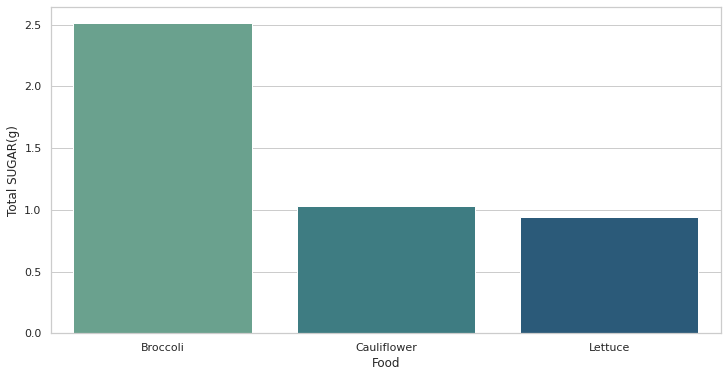

In [41]:
sns.barplot(y="Total SUGAR(g)", x = "Food", data = df_food_comparative,  palette="crest");

### Veo que se refuta mi hipótesis ya que el Brócoli tiene más azucar que la lechuga pero también tiene más azúcar que la coliflor.

### Hipótesis 2

#### Creo un df solo para comparar los 2 alimentos de mi segunda hipótesis

In [56]:
df_food_comparative2 = df[(df["Food"].isin(["Potato","Sweet Potato"]))]

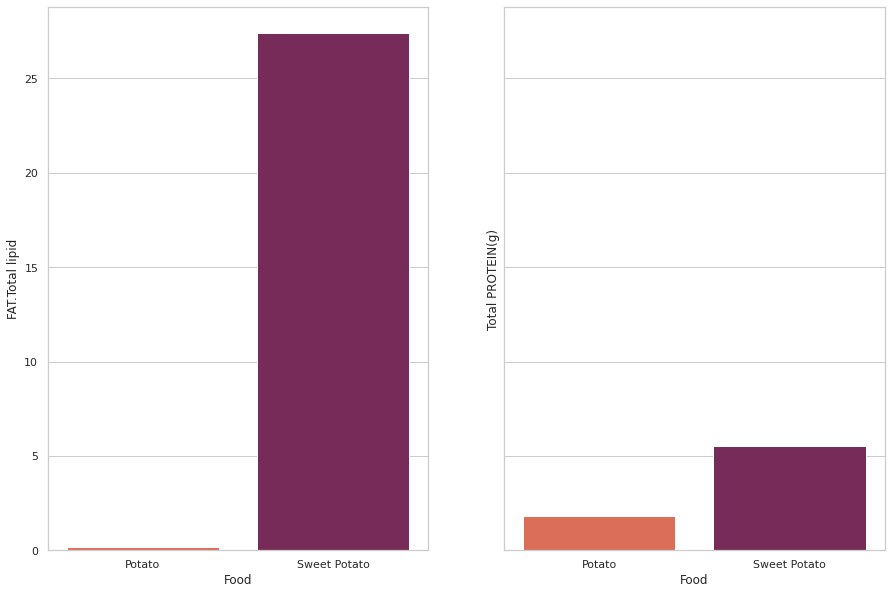

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10),sharey = True) #comparto la escala del eje
sns.barplot(y="FAT.Total lipid", x = "Food", data = df_food_comparative2,  palette="rocket_r", ax=ax[0])
sns.barplot(y="Total PROTEIN(g)", x = "Food", data = df_food_comparative2,  palette="rocket_r", ax=ax[1]);

### Veo que se cumple mi hipótesis ya que la patata tiene menos proteínas y menos grasas totales que el boniato.

In [62]:
df_food_comparative3 = df[(df["Food"].isin(["Taco","BBQ Chicken Pizza","Burger King Whopper","Hot Dog","Lasagna","McRib","Nachos with Cheese","Whopper"]))]

<AxesSubplot:xlabel='Calories', ylabel='Count'>

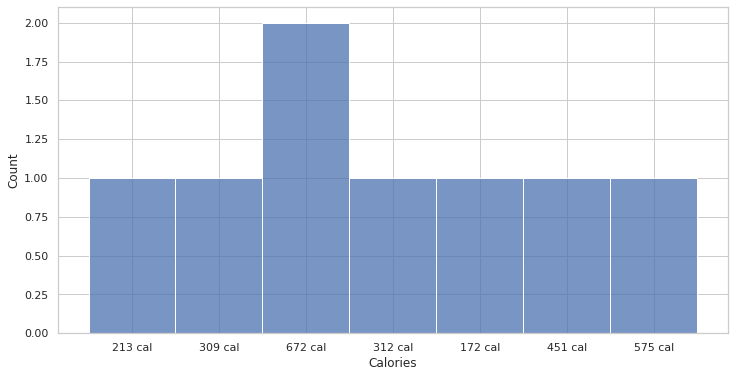

In [63]:
sns.histplot(x=df_food_comparative3.Calories)

<AxesSubplot:>

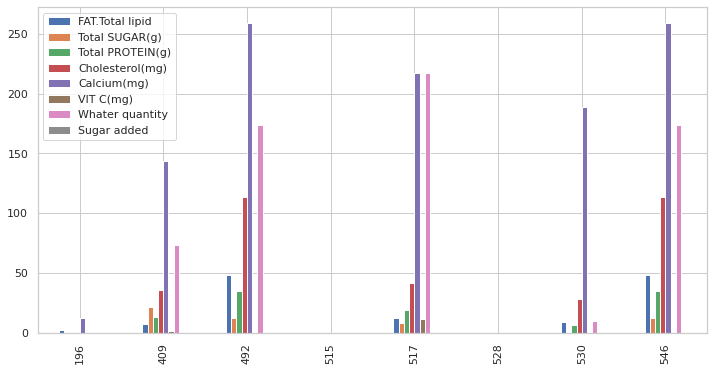

In [64]:
df_food_comparative3.plot(kind="bar")